# Mencari pasar terbaik untuk iklan

Pada analisa kali ini asumsi bahwa kita bekerja pada perusahaan yang bergerak di bidang e-learning. Perusahaan kita kebanyakan menyediakan kelas web dan mobile development, tapi juga menyediakan kelas di bidang lain, seperti data science,game development,dll. Kita ingin membuat iklan untuk promosi kelas-kelas tersebut. Untuk itu kita akan mencari tahu bagaimana cara terbaik mengoptimalkan iklan yang kita buat.

Untuk mencapai hal tersebut kita akan menggunakan data dari [freeCodeCamp's 2017 New Coder Survey'](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) sebagai pendekatan daripada membuat survey baru lagi. Data survey tersebut bisa di cek pada link berikut [freeCodeCamp survey](https://github.com/freeCodeCamp/2017-new-coder-survey). Dataset yang kita gunakan berguna untuk menjawab pertanyaan kita karena survey ini didapat dari perusahaan yang mirip dengan perusahaan kita dan responder survey ini dapat dibilang banyak sehingga cukup untuk menjawab pertanyaan kita. Dataset ini berisi tentang kelas-kelas yang diikuti oleh responder dan bagaimana minat mereka dalam mempelajari suatu hal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
print(survey.shape)
pd.options.display.max_columns = 150
survey.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Kita ingin mencari minat dari orang yang baru masuk ke dunia coding, untuk itu kita akan mencari responder dengan kriteria berikut dari dataset yang kita gunakan:
- Dimana para coder baru ini 
- Lokasi dimana terdapat banyak coder baru 
- Berapa banyak uang coder baru ini rela membayar untuk mengikuti kelas


In [2]:
#Mencari apakah sample pada dataset merepresentasikan populasi yang kita inginkan
#Mencari pekerjaan yang diinginkan responder dalam bentuk persen
print(survey['JobRoleInterest'].value_counts(normalize=True)*100)

Full-Stack Web Developer                                                                                                                                                                                         11.770595
  Front-End Web Developer                                                                                                                                                                                         6.435927
  Data Scientist                                                                                                                                                                                                  2.173913
Back-End Web Developer                                                                                                                                                                                            2.030892
  Mobile Developer                                                                                                          

Dari dataset diatas kita dapat menyimpulkan bahwa banyak responden yang ingin bekerja dalam bidang web development dan sedikit yang tertarik dalam bidang mobile development. Selain itu banyak responden yang mengisi lebih dari satu yang menandakan responden masih bimbang dalam pilihan pekerjaannya. Untuk itu kita akan lihat lebih jauh berapa banyak pekerjaan yang diinginkan oleh responden.

In [3]:
#memisahkan pekerjaan sesuai koma
job = survey['JobRoleInterest'].dropna()
splitJob = job.str.split(',')

#Menghitung jumlah pekerjaan yang diminati responden
freqSplitJob = splitJob.apply(lambda x:len(x))#x berbentuk list pekerjaan
#print jumlah pekerjaan dalam bentuk persen
print(freqSplitJob.value_counts(normalize=True)*100)


1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64


Diatas kita mencari ketertarikan responder terhadap pekerjaan yang diinginkannya. Ternyata dari hasil yang kita dapat hanya 31% responder yang tau pasti mereka ingin bekerja sebagai apa. Mayoritas memiliki ketertarikan yang beragam(>1). Hal ini dapat dikatakan bagus untuk kita karena perusahaan kita menyediakan banyak kelas selain web development dan mobile development saja.

In [7]:
def jobRole(arr):
    webDev = ['Web Developer','Full-Stack Developer','Back-End Web Developer','Front-End Web Developer']
    web = False
    mob = False
   
    if 'Mobile Developer' in arr:
        mob = True
    for w in webDev:
        if w in arr:
            web=True
            break
    if (web==True & mob==True):
        return 'Web Developer,Mobile Developer,Another'
    elif(web==True):
        return 'Web Developer,Another'
    elif (mob==True):
        return 'Mobile Developer,Another'
    else:
        return 'Not Mobile Developer or Web Developer'

freqRole = job.apply(jobRole)
print(freqRole.value_counts(normalize=True)*100)



Web Developer,Another                     53.289474
Web Developer,Mobile Developer,Another    29.319222
Not Mobile Developer or Web Developer     13.758581
Mobile Developer,Another                   3.632723
Name: JobRoleInterest, dtype: float64


Lalu kita cari sebenarnya berapa ketertarikan responder pada kelas utama yang kita sajikan dari perusahaan kita. Diatas Terlihat ternyata mayoritas responder tertarik pada web developer saja/dengan kelas lainnya. Dan ternyata minat terhadap web development+mobile development+kelas lainnya juga lumayan banyak. Dan yang paling sedikit diminati adalah mobile development saja+kelas lainnya. Sehingga perusahaan kita kemungkinan besar cocok untuk coder baru sesuai dataset yang kita gunakan.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


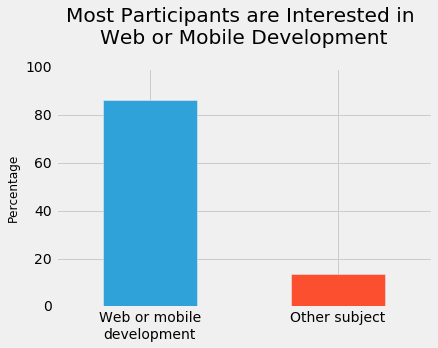

In [10]:
simpleFreq = job.str.contains('Web Developer|Mobile Developer')
freqTable = simpleFreq.value_counts(normalize=True)*100
print(freqTable)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freqTable.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

Secara Garis Besar kita dapat lihat bahwa mayoritas orang berminat untuk mengikuti kelas web development atau mobile development. Walau respondent juga dapat tertarik ke hal lainnya namun mayoritas memasukkan web/mobile development dalam daftar minatnya. Sehingga kita dapat menyimpulkan setidaknya perusahaan kita berjalan ke arah yang benar. Selanjutnya kita akan melihat minat responder secara lebih spesifik lagi.

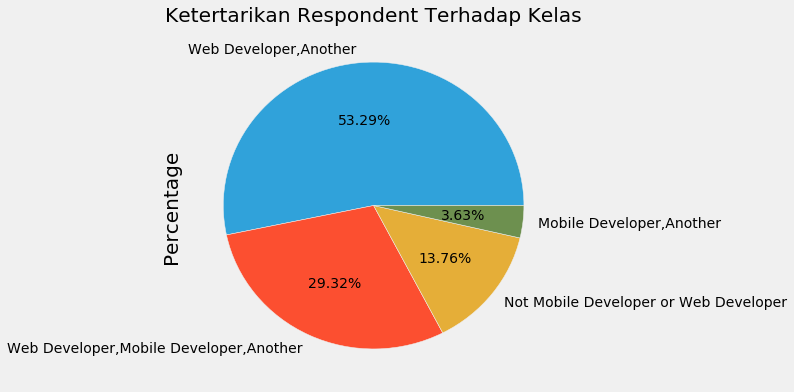

In [11]:
freqRoleTable = freqRole.value_counts()
freqRoleTable.plot.pie(figsize=(6,6),title='Ketertarikan Respondent Terhadap Kelas', autopct = '%.2f%%')
plt.ylabel('Percentage', fontsize = 20)


Pada Grafik diatas kita melihat mayoritas orang hanya tertarik pada web development tanpa/dengan  mobile development dan sangat sedikit orang yang tertarik kepada mobile development saja tanpa web developmentnya. Sehingga kita seharusnya lebih menargetkan peningkatan kelas pada web development sesuai minat responder. Dari grafik diatas juga kita sekarang dapat yakin bahwa target orang yang kita tuju sudah tepat dengan kelas utama yang kita sajikan. Setelah mengetahui minat responder selanjutnya kita akan melanjutkan tujuan yang kita sebutkan sebelumnya yaitu:
- Dimana para coder baru ini 
- Lokasi dimana terdapat banyak coder baru 
- Berapa banyak uang coder baru ini rela membayar untuk mengikuti kelas

# Mencari Tahu Lokasi Pasar yang Tepat
Untuk mengoptimalkan iklan yang kita akan buat maka sebelum itu kita perlu mencari pasar yang optimal juga. Semakin banyak orang yang tinggal di area tersebut semakin baik. Untungnya dataset ini menyediakan 2 kolom untuk hal itu. Kolom 'CountryCitizen' mendeskripsikan negara asal respondent, dan kolom 'CountryLive' mendeskripsikan negara tempat tinggal respondent sekarang. Untuk pemasaran kita lebih tertarik tempat tinggal responder sekarang dibanding daerah asal mereka. Untuk itu kita akan lebih menganalisa kolom 'CountryLive' saja.

In [12]:
countryLive = survey['CountryLive']
freqCountryPercent = countryLive.value_counts(normalize=True)*100
freqCountryCount = countryLive.value_counts()
freqCountry = pd.DataFrame(data={'Count':freqCountryCount,'Percent':freqCountryPercent})
print(freqCountry)

                               Count    Percent
United States of America        5791  37.760824
India                           1400   9.128847
United Kingdom                   757   4.936098
Canada                           616   4.016693
Brazil                           364   2.373500
Germany                          324   2.112676
Poland                           265   1.727960
Russia                           263   1.714919
Australia                        259   1.688837
France                           228   1.486698
Spain                            217   1.414971
Nigeria                          214   1.395409
Ukraine                          202   1.317162
Romania                          171   1.115023
Italy                            164   1.069379
Mexico                           155   1.010694
Netherlands (Holland, Europe)    142   0.925926
Philippines                      135   0.880282
South Africa                     126   0.821596
Turkey                           120   0

Dari data diatas setidaknya kita dapat memfokuskan pemasaran kita pada 2 negara yaitu US dan India. Terutama US karena mayoritas responder survey tinggal di negara tersebut. Selanjutnya kita perlu melihat berapa banyak uang yang rela responder keluarkan pada e-learning.

Asumsikan kita mempunyai produk yang berharga subskripsi 30$ perbulan,sehingga kita tertarik bagaimana kerelaan responder untuk membayar suatu kelas. Karena pemasaran kita akan percuma jika memasarkan kepada responder yang mayoritas tidak ingin membayar lebih dari atau sama dengan harga produk kita. Untuk itu kita akan menggunakan kolom 'MoneyForLearning' yang menjelaskan berapa banyak uang yang dihabiskan responder dari mereka mulai belajar coding sampai ikut survey kita. Selanjutnya analisis yang akan kita lakukan berhubungan dengan kelas yang kita buat yang menggunakan bahasa inggris. Untuk itu kita akan menyempitkan analisa kita kepada 4 negara yaitu:US,India,UK,Canada hal ini karena
- Negara ini adalah 4 besar dalam table frekuensi kita diatas
- 4 negara ini menggunakan bahasa Inggris sebagai bahasa resminya

In [13]:
#Membuat kolom baru yang menjelaskan uang/bulan yang mereka habiskan untuk belajar
survey['MonthsProgramming'].replace(0,1, inplace=True)  

survey['MoneyPerMonth'] = survey['MoneyForLearning']/survey['MonthsProgramming']
print(survey['MoneyPerMonth'].isnull().sum())


1995


Karena banyak baris yang kosong pada kolom yang baru kita buat maka kita hanya akan memakai baris-baris yang tidak null.

In [14]:
survey = survey[survey['MoneyPerMonth'].notnull()]
survey = survey[survey['CountryLive'].notnull()]
print(survey['CountryLive'].value_counts().head())

United States of America    5471
India                       1221
United Kingdom               698
Canada                       578
Brazil                       315
Name: CountryLive, dtype: int64


In [17]:
#Dengan data yang bersih sempitkan lagi agar hanya 4 negara
usData = survey[survey['CountryLive']=='United States of America']
indiaData = survey[survey['CountryLive']=='India']
ukData = survey[survey['CountryLive']=='United Kingdom']
canadaData = survey[survey['CountryLive']=='Canada']
analyze = pd.concat([usData,indiaData,ukData,canadaData])

marketing = analyze.groupby('CountryLive').mean()
print(marketing['MoneyPerMonth'])

CountryLive
Canada                      118.434054
India                        66.526198
United Kingdom               55.774980
United States of America    206.297711
Name: MoneyPerMonth, dtype: float64


Secara logika angka rata-rata yang kita dapat masuk akal untuk US dan Canada karena mereka negara maju sehingga kita mempunyai ekspetasi mereka memiliki uang lebih untuk mengikuti kursus online. Namun pada negara UK kita melihat bahwa angka rata-ratanya sangat lah kecil bahkan lebih kecil daripada India yang secara ekonomi dapat dibilang masyarakatnya lebih tidak sejahtera. Untuk itu kita akan menganalisanya lebih dalam untuk melihat apakah ada outlier sehingga rata-rata yang didapat terpengaruh.

# Hal yang Dilakukan pada Outlier
Pertama kita akan mencek outlier yang terdapat pada data, setelah itu kita akan menganalisa outlier tersebut lebih jauh dan kemudian memutuskan akan diapakan outlier-outlier tersebut.

In [20]:
print(analyze['MoneyPerMonth'])

1          13.333333
2         200.000000
7           0.000000
8          24.137931
10          0.000000
12          0.000000
15          0.000000
16         16.666667
17          2.500000
18         35.714286
19         17.857143
21        100.000000
23        100.000000
26        416.666667
28          2.416667
30         66.666667
31          0.000000
32        100.000000
33         83.333333
35          0.000000
38          8.333333
40         25.000000
42         50.000000
46        933.333333
56         41.666667
57         22.222222
63         16.666667
66          2.777778
67          1.785714
68        357.142857
            ...     
17275       0.000000
17325       0.000000
17333       0.000000
17362       0.000000
17366      70.000000
17381       4.629630
17418       0.000000
17420       2.500000
17448       0.000000
17482       0.000000
17512       5.000000
17539      25.000000
17557      50.000000
17569       0.000000
17638      25.000000
17729       0.000000
17735       0

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



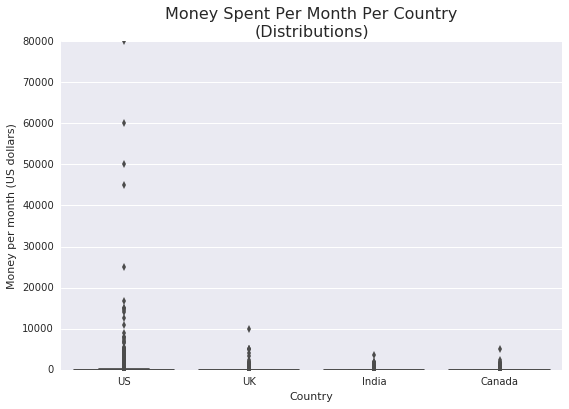

In [22]:
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = analyze)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


Pada outlier-outlier diatas kita bisa tidak bisa menyimpulkan ada kesalahan pada data di UK,India,dan Canada. Namun pada US banyak hal aneh terutama outlier yang menandakan sudah menghabiskan uang diatas 20 ribu $. Maka kita akan meanghapus outlier-outlier tersebut karena kemungkinan data yang valid sangatlah kecil.

In [26]:
analyze = analyze[analyze['MoneyPerMonth']<20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



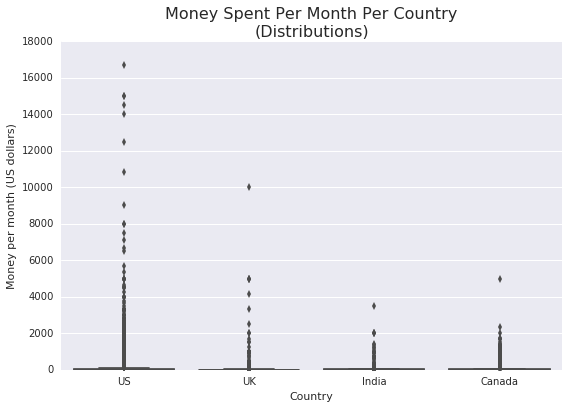

In [27]:
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = analyze)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Dari boxplot diatas responden US masih memeiliki beberapa outlier ekstrim yaitu yang diatas 6000$. Maka kita akan outlier-outlier tersebut.

In [30]:
usOutlier = analyze[(analyze['MoneyPerMonth']>6000)&(analyze['CountryLive']=='United States of America')]
usOutlier

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718    26.0               1.0             0.0                0.0   
1222   32.0               1.0             0.0                0.0   
2404   22.0               1.0             1.0                1.0   
3184   34.0               1.0             1.0                0.0   
3930   31.0               0.0             NaN                NaN   
5695   27.0               1.0             0.0                0.0   
6805   46.0               1.0             1.0                1.0   
7198   32.0               0.0             NaN                NaN   
7505   26.0               1.0             0.0                1.0   
9778   33.0               1.0             0.0                1.0   
15565  23.0               0.0             NaN                NaN   
16650  29.0               0.0             NaN                NaN   
16997  27.0               0.0             NaN                NaN   
17231  50.0               0.0             NaN   

Dari 14 outlier ekstrim ini, enam orang menghadiri bootcamp, yang membenarkan sejumlah besar uang yang dihabiskan untuk belajar. Untuk lima lainnya, sulit untuk mencari tahu dari data di mana mereka bisa menghabiskan banyak uang untuk belajar. Karenanya, kami akan menghapus baris-baris itu di mana para peserta melaporkan bahwa mereka menghabiskan \ $ 6000 setiap bulan, tetapi mereka tidak pernah menghadiri bootcamp.

Data menunjukkan bahwa beberapa responden telah memprogram tidak lebih dari tiga bulan ketika mereka menyelesaikan survei. Mereka kemungkinan besar membayar sejumlah besar uang untuk bootcamp yang akan berlangsung selama beberapa bulan, sehingga jumlah uang yang dihabiskan per bulan tidak realistis dan harus jauh lebih rendah (karena mereka mungkin tidak menghabiskan apa pun untuk pasangan berikutnya). bulan setelah survei). Sebagai konsekuensinya, kami akan menghapus setiap delapan outlier ini.

Di blok kode berikutnya, kita akan menghapus responden yang:

- Tidak menghadiri bootcamps.
- Sudah pemrograman selama tiga bulan atau kurang ketika pada saat mereka menyelesaikan survei.


In [32]:
noBootCamp = analyze[(analyze['MoneyPerMonth']>6000)&
                     (analyze['CountryLive']=='United States of America')&
                    (analyze['AttendedBootcamp']==0)]
analyze = analyze.drop(noBootCamp.index)

kurangDariTiga = analyze[(analyze['MoneyPerMonth']>6000)&
                     (analyze['CountryLive']=='United States of America')&
                    (analyze['MonthsProgramming']<=3)]
analyze = analyze.drop(kurangDariTiga.index)
#analyze

Lalu kita akan melihat outlier yang terdapat pada negara UK. Pada negara tersebut outlier ekstrim adalah orang dengan kolom 'MoneyPerMonth' yang melebihi 2000$

In [42]:
ukOutlier = analyze[(analyze['MoneyPerMonth']>2000)&(analyze['CountryLive']=='United Kingdom')]
ukOutlier[['AttendedBootcamp','MonthsProgramming']]

,AttendedBootcamp,MonthsProgramming


Dengan alasan yang sama dengan outlier US maka kita akan menghapus baris ini

In [35]:
analyze=analyze.drop(ukOutlier.index)

Selanjutnya kita akan melihat bagaimana outlier yang terdapat pada negara India.

In [38]:
indiaOutlier = analyze[(analyze['MoneyPerMonth']>2000)&(analyze['CountryLive']=='India')]
indiaOutlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

In [40]:
indiaOutlier[['AttendedBootcamp','MonthsProgramming','MoneyPerMonth']]

,AttendedBootcamp,MonthsProgramming,MoneyPerMonth
1728,0.0,4.0,5000.000000
1755,0.0,15.0,3333.333333
2044,0.0,1.0,2500.000000
7989,0.0,1.0,5000.000000
8126,0.0,1.0,5000.000000
13398,0.0,2.0,10000.000000
15587,0.0,24.0,4166.666667


Dari table diatas banyak responder yang memiliki pengalaman belajar <=4 bulan namun sudah menghabiskan banyak sekali uang untuk belajar pada kursus ini. Dan karena mereka tidak mengikuti bootcamp apapun hal ini kemungkinan besar tidak mungkin sehingga kita pasti menghapusnya. Untuk data dengan pengalaman belajar programming >=15 bulan outlier ini masuk akal karena mereka memang sudah lama belajar programming dan kemungkinan besar sudah menghabiskan uang banyak untuk mengejar hal tersebut.

In [41]:
indiaDrop = analyze[(analyze['MoneyPerMonth']>2000)&
                     (analyze['CountryLive']=='India')&
                    (analyze['AttendedBootcamp']==0)]
analyze = analyze.drop(indiaDrop.index)

Terakhir kita akan melihat bagaimana outlier pada negara Canada.

In [44]:
canadaOutlier = analyze[(analyze['MoneyPerMonth']>4000)&(analyze['CountryLive']=='Canada')]
canadaOutlier[['AttendedBootcamp','MonthsProgramming','MoneyPerMonth']]

,AttendedBootcamp,MonthsProgramming,MoneyPerMonth
13659,1.0,2.0,5000.0


In [46]:
analyze = analyze.drop(canadaOutlier.index)

Di sini, situasinya mirip dengan beberapa responden AS - peserta ini telah memprogram tidak lebih dari dua bulan ketika ia menyelesaikan survei. Dia tampaknya telah membayar sejumlah besar uang pada awalnya untuk mendaftar di bootcamp, dan kemudian dia mungkin tidak menghabiskan apa pun untuk beberapa bulan ke depan setelah survei. Kita akan mengambil pendekatan yang sama di sini untuk AS dan menghapus baris ini.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



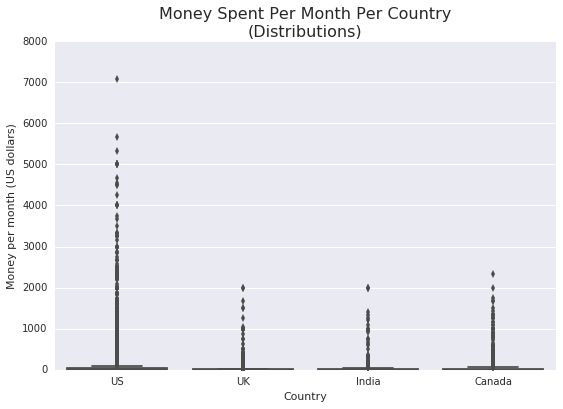

In [47]:
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = analyze)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

# Mencari Negara Pemasaran Terbaik
Setelah membersihkan data sesuai kriteria yang kita inginkan pertanyaan selanjutnya adalah memilih negara investasi untuk iklan kita. Pertama mari kita lihat:
- Bagaimana rata-rata kecendrungan orang untuk membayar kelas online per negara
- Jumlah negara tempat tinggal responder

In [49]:
countryMean = analyze.groupby('CountryLive').mean()
countryMean['MoneyPerMonth']

CountryLive
Canada                      109.973801
India                        38.079479
United Kingdom               50.833481
United States of America    132.860464
Name: MoneyPerMonth, dtype: float64

In [51]:
countryPercent = analyze['CountryLive'].value_counts(normalize=True)*100
countryPercent

United States of America    68.668933
India                       15.287747
United Kingdom               8.777232
Canada                       7.266087
Name: CountryLive, dtype: float64

Untuk pemilihan target pasar terbaik sudah pasti adalah negara Amerika Serikat karena mayoritas responder berasal dari situ dan rata-rata uang yang dikeluarkan perbulan cukup tinggi. Lalu setelah itu kita memiliki dua pilihan yaitu India atau Canada. Untuk rata-rata uang perbulan yang dikeluarkan Canada jauh diatas India namun responder lebih banyak tinggal di India. Namun karena asumsi awal subskripsi perbulan untuk kelas yang kita sajikan hanyalah 30$ per bulan maka India adalah pilihan yang lebih masuk akal, hal ini karena rata-rata uang yang mereka keluarkan masih diatas harga kelas kita dan jumlah responder dari India kira-kira lebih banyak dibanding Canada dan UK digabung.
Untuk strategi pemasaran terdapat beberapa pilihan yaitu:

1. Beriklan di AS, India, dan Kanada dengan membagi anggaran iklan dalam berbagai kombinasi:
    - 60% untuk AS, 25% untuk India, 15% untuk Kanada.
    - 50% untuk AS, 30% untuk India, 20% untuk Kanada; dll.

2. Beriklan hanya di AS dan India, atau AS dan Kanada. Sekali lagi, masuk akal untuk membagi anggaran iklan secara tidak merata. Misalnya:
    - 70% untuk AS, dan 30% untuk India.
    - 65% untuk AS, dan 35% untuk Kanada; dll.

3. Beriklan hanya di AS.